In [48]:
import json
import pickle
import numpy as np
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [49]:
file_path = '/home/rsaha/projects/dm_alchemy/src/data/generated_data/decompositional_chemistry_samples_167424_80_unique_stones_train_shop_2_qhop_1_seed_0.json'

In [50]:
data = json.load(open(file_path, 'r'))

In [51]:
episode_ids = list(data['episodes'].keys())

In [52]:
# data['episodes']['160652']['support']
# episode_ids[:10]  # just to see the first 10 episode ids

In [53]:
input_rewards = []
output_rewards = []

for episode_id in tqdm(episode_ids):
    supports = data['episodes'][episode_id]['support']
    for support in supports:
        # Parse the support string to extract input and output rewards
        parts = support.split(' -> ')
        input_part = parts[0]
        output_part = parts[1]

        # Extract input reward
        input_reward_start = input_part.find('reward: ') + 8
        input_reward_end = input_part.find('}', input_reward_start)
        input_reward = int(input_part[input_reward_start:input_reward_end])

        # Extract output reward
        output_reward_start = output_part.find('reward: ') + 8
        output_reward_end = output_part.find('}', output_reward_start)
        output_reward = int(output_part[output_reward_start:output_reward_end])

        input_rewards.append(input_reward)
        output_rewards.append(output_reward)
    
    

100%|██████████| 150682/150682 [00:06<00:00, 24554.37it/s]


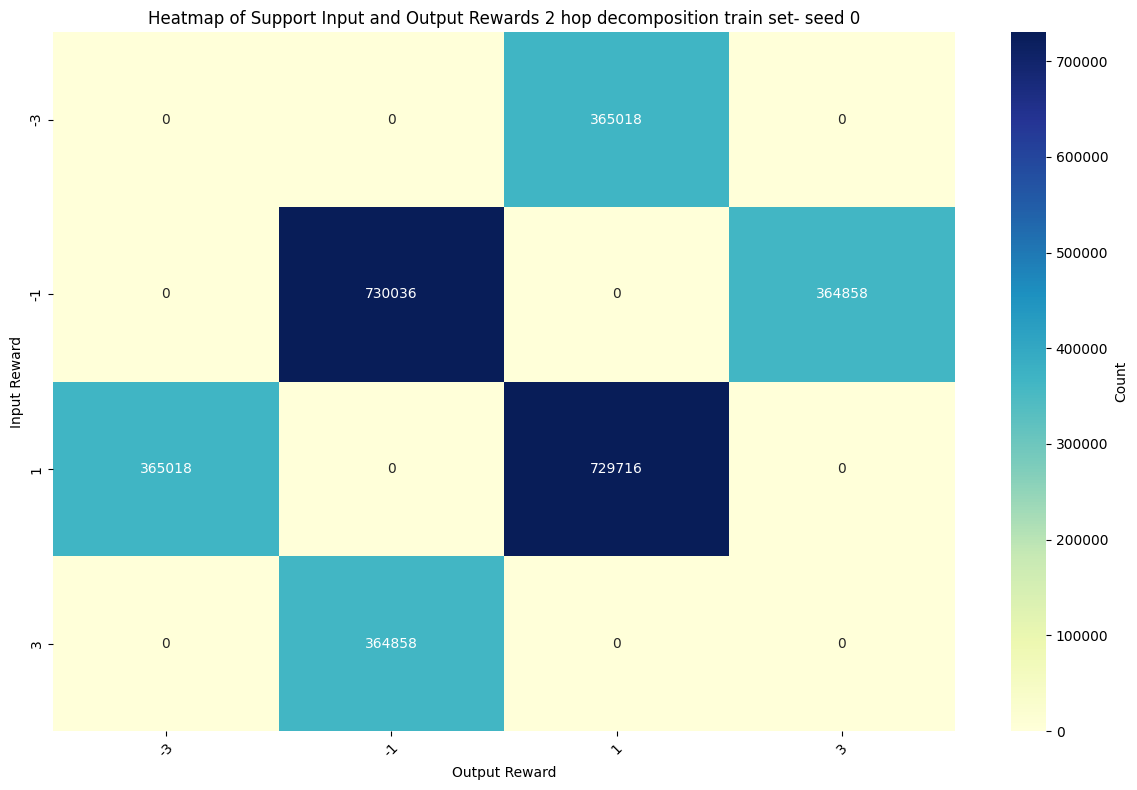

In [64]:
# Create a DataFrame for visualization
df = pd.DataFrame({
    'input_reward': input_rewards,
    'output_reward': output_rewards
})

# Count the number of occurrences of each reward pair
reward_counts = df.groupby(['input_reward', 'output_reward']).size().reset_index(name='count')
# Create a pivot table for heatmap
reward_pivot = reward_counts.pivot(index='input_reward', columns='output_reward', values='count').fillna(0)
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(reward_pivot.astype(int), annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Support Input and Output Rewards 2 hop decomposition train set- seed 0')
plt.xlabel('Output Reward')
plt.ylabel('Input Reward')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# Also just print the counts for each reward pair
for (input_reward, output_reward), count in reward_counts.set_index(['input_reward', 'output_reward']).iterrows():
    print(f"Input Reward: {input_reward}, Output Reward: {output_reward}, Count: {count}")

Input Reward: -3, Output Reward: 1, Count: count    365018
Name: (-3, 1), dtype: int64
Input Reward: -1, Output Reward: -1, Count: count    730036
Name: (-1, -1), dtype: int64
Input Reward: -1, Output Reward: 3, Count: count    364858
Name: (-1, 3), dtype: int64
Input Reward: 1, Output Reward: -3, Count: count    365018
Name: (1, -3), dtype: int64
Input Reward: 1, Output Reward: 1, Count: count    729716
Name: (1, 1), dtype: int64
Input Reward: 3, Output Reward: -1, Count: count    364858
Name: (3, -1), dtype: int64


In [56]:
# Extract color, size, and roundness features for input and output
input_colors = []
output_colors = []
input_sizes = []
output_sizes = []
input_roundness = []
output_roundness = []

for episode_id in tqdm(episode_ids):
    supports = data['episodes'][episode_id]['support']
    for support in supports:
        # Parse the support string to extract input and output features
        parts = support.split(' -> ')
        input_part = parts[0]
        output_part = parts[1]

        # Extract input features
        input_color_start = input_part.find('color: ') + 7
        input_color_end = input_part.find(',', input_color_start)
        input_color = input_part[input_color_start:input_color_end]
        
        input_size_start = input_part.find('size: ') + 6
        input_size_end = input_part.find(',', input_size_start)
        input_size = input_part[input_size_start:input_size_end]
        
        input_round_start = input_part.find('roundness: ') + 11
        input_round_end = input_part.find(',', input_round_start)
        input_round = input_part[input_round_start:input_round_end]

        # Extract output features
        output_color_start = output_part.find('color: ') + 7
        output_color_end = output_part.find(',', output_color_start)
        output_color = output_part[output_color_start:output_color_end]
        
        output_size_start = output_part.find('size: ') + 6
        output_size_end = output_part.find(',', output_size_start)
        output_size = output_part[output_size_start:output_size_end]
        
        output_round_start = output_part.find('roundness: ') + 11
        output_round_end = output_part.find(',', output_round_start)
        output_round = output_part[output_round_start:output_round_end]

        input_colors.append(input_color)
        output_colors.append(output_color)
        input_sizes.append(input_size)
        output_sizes.append(output_size)
        input_roundness.append(input_round)
        output_roundness.append(output_round)

# Create DataFrames for each feature
color_df = pd.DataFrame({
    'input_color': input_colors,
    'output_color': output_colors
})

size_df = pd.DataFrame({
    'input_size': input_sizes,
    'output_size': output_sizes
})

roundness_df = pd.DataFrame({
    'input_roundness': input_roundness,
    'output_roundness': output_roundness
})

# Calculate value counts for each feature
print("Color feature pairs:")
color_counts = color_df.groupby(['input_color', 'output_color']).size().reset_index(name='count')
for _, row in color_counts.iterrows():
    print(f"Input Color: {row['input_color']}, Output Color: {row['output_color']}, Count: {row['count']}")

print("\nSize feature pairs:")
size_counts = size_df.groupby(['input_size', 'output_size']).size().reset_index(name='count')
for _, row in size_counts.iterrows():
    print(f"Input Size: {row['input_size']}, Output Size: {row['output_size']}, Count: {row['count']}")

print("\nRoundness feature pairs:")
roundness_counts = roundness_df.groupby(['input_roundness', 'output_roundness']).size().reset_index(name='count')
for _, row in roundness_counts.iterrows():
    print(f"Input Roundness: {row['input_roundness']}, Output Roundness: {row['output_roundness']}, Count: {row['count']}")

100%|██████████| 150682/150682 [00:12<00:00, 11921.12it/s]


Color feature pairs:
Input Color: blue, Output Color: blue, Count: 243228
Input Color: blue, Output Color: purple, Count: 243266
Input Color: blue, Output Color: red, Count: 608447
Input Color: purple, Output Color: blue, Count: 243266
Input Color: purple, Output Color: purple, Count: 243490
Input Color: purple, Output Color: red, Count: 243076
Input Color: red, Output Color: blue, Count: 608447
Input Color: red, Output Color: purple, Count: 243076
Input Color: red, Output Color: red, Count: 243208

Size feature pairs:
Input Size: large, Output Size: large, Count: 243604
Input Size: large, Output Size: medium, Count: 243318
Input Size: large, Output Size: small, Count: 608212
Input Size: medium, Output Size: large, Count: 243318
Input Size: medium, Output Size: medium, Count: 243180
Input Size: medium, Output Size: small, Count: 243076
Input Size: small, Output Size: large, Count: 608212
Input Size: small, Output Size: medium, Count: 243076
Input Size: small, Output Size: small, Count:

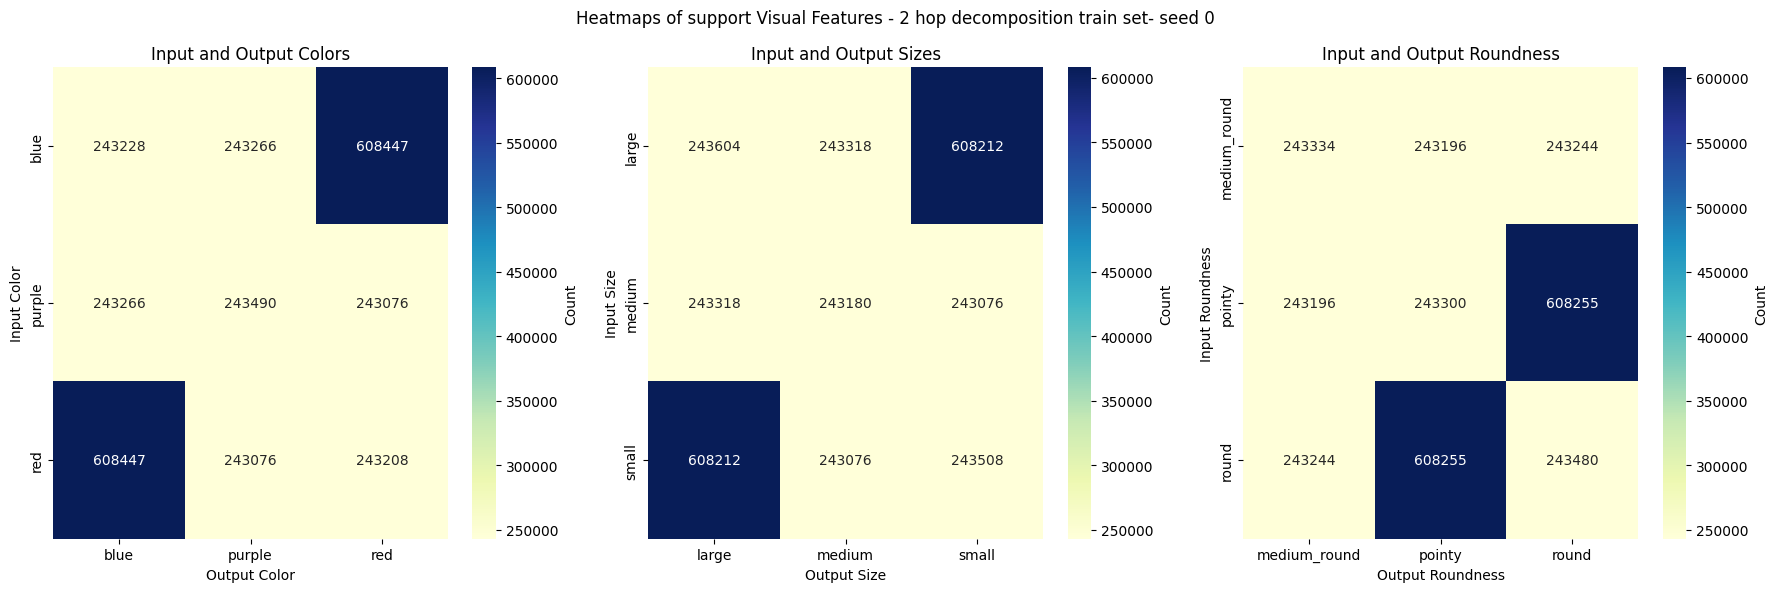

In [65]:
# Create a DataFrame for visualization for the visual features and create 3 heatmaps for each visual feature

df = pd.DataFrame({
    'input_color': input_colors,
    'output_color': output_colors,
    'input_size': input_sizes,
    'output_size': output_sizes,
    'input_roundness': input_roundness,
    'output_roundness': output_roundness
})
# Count the number of occurrences of each feature pair and create heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Color heatmap
color_counts = df.groupby(['input_color', 'output_color']).size().reset_index(name='count')
color_pivot = color_counts.pivot(index='input_color', columns='output_color', values='count').fillna(0)
sns.heatmap(color_pivot.astype(int), annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, ax=axes[0])
axes[0].set_title('Input and Output Colors')
axes[0].set_xlabel('Output Color')
axes[0].set_ylabel('Input Color')

# Size heatmap
size_counts = df.groupby(['input_size', 'output_size']).size().reset_index(name='count')
size_pivot = size_counts.pivot(index='input_size', columns='output_size', values='count').fillna(0)
sns.heatmap(size_pivot.astype(int), annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, ax=axes[1])
axes[1].set_title('Input and Output Sizes')
axes[1].set_xlabel('Output Size')
axes[1].set_ylabel('Input Size')

# Roundness heatmap
roundness_counts = df.groupby(['input_roundness', 'output_roundness']).size().reset_index(name='count')
roundness_pivot = roundness_counts.pivot(index='input_roundness', columns='output_roundness', values='count').fillna(0)
sns.heatmap(roundness_pivot.astype(int), annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, ax=axes[2])
axes[2].set_title('Input and Output Roundness')
axes[2].set_xlabel('Output Roundness')
axes[2].set_ylabel('Input Roundness')

fig.suptitle('Heatmaps of support Visual Features - 2 hop decomposition train set- seed 0')
plt.tight_layout()
plt.show()

# Query examples

In [61]:
# Now we should also do the same for the query examples.

input_rewards_query = []
output_rewards_query = []

for episode_id in tqdm(episode_ids):
    supports = data['episodes'][episode_id]['query']
    for support in supports:
        # Parse the support string to extract input and output rewards
        parts = support.split(' -> ')
        input_part = parts[0]
        output_part = parts[1]

        # Extract input reward
        input_reward_start = input_part.find('reward: ') + 8
        input_reward_end = input_part.find('}', input_reward_start)
        input_reward = int(input_part[input_reward_start:input_reward_end])

        # Extract output reward
        output_reward_start = output_part.find('reward: ') + 8
        output_reward_end = output_part.find('}', output_reward_start)
        output_reward = int(output_part[output_reward_start:output_reward_end])

        input_rewards_query.append(input_reward)
        output_rewards_query.append(output_reward)
    
     

100%|██████████| 150682/150682 [00:04<00:00, 30219.94it/s]


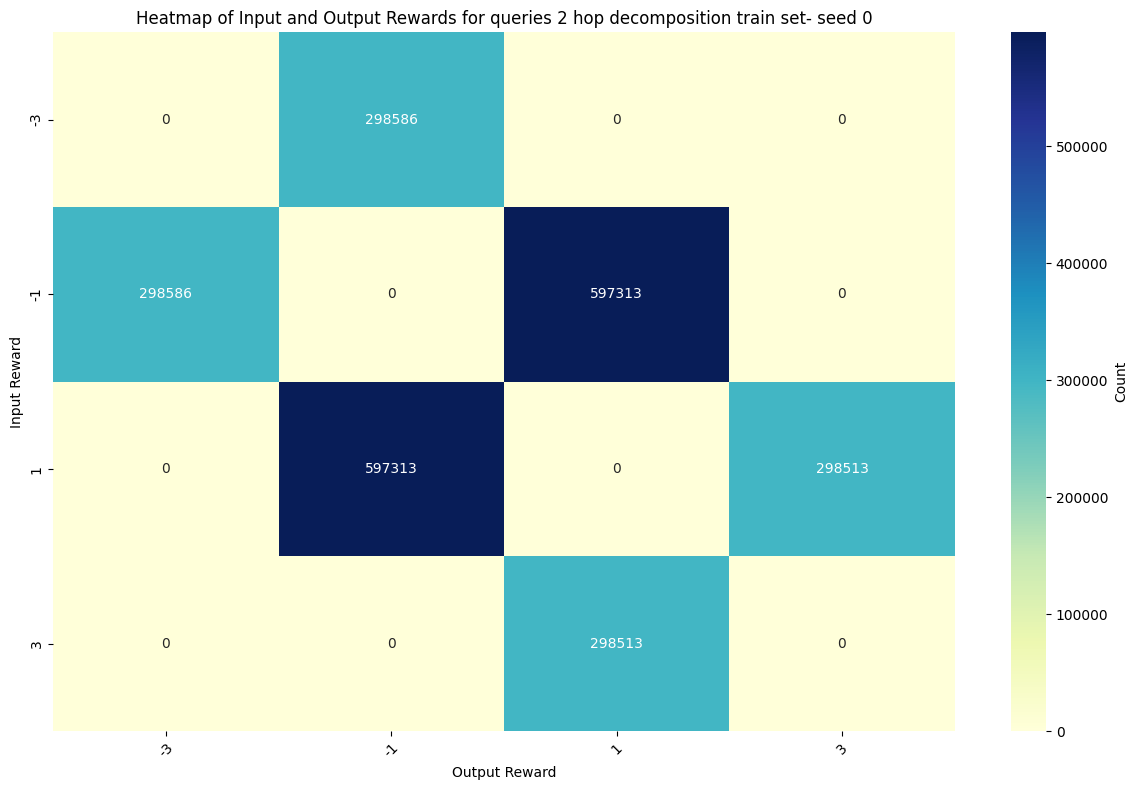

In [62]:
# Create a DataFrame for visualization
df_query = pd.DataFrame({
    'input_reward': input_rewards_query,
    'output_reward': output_rewards_query
})

# Count the number of occurrences of each reward pair
reward_counts = df_query.groupby(['input_reward', 'output_reward']).size().reset_index(name='count')
# Create a pivot table for heatmap
reward_pivot = reward_counts.pivot(index='input_reward', columns='output_reward', values='count').fillna(0)
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(reward_pivot.astype(int), annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Input and Output Rewards for queries 2 hop decomposition train set- seed 0')
plt.xlabel('Output Reward')
plt.ylabel('Input Reward')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

100%|██████████| 150682/150682 [00:10<00:00, 14661.06it/s]


Color feature pairs in queries:
Input Color: blue, Output Color: blue, Count: 497672
Input Color: blue, Output Color: purple, Count: 199152
Input Color: blue, Output Color: red, Count: 199145
Input Color: purple, Output Color: blue, Count: 199152
Input Color: purple, Output Color: purple, Count: 198974
Input Color: purple, Output Color: red, Count: 199037
Input Color: red, Output Color: blue, Count: 199145
Input Color: red, Output Color: purple, Count: 199037
Input Color: red, Output Color: red, Count: 497510

Size feature pairs in queries:
Input Size: large, Output Size: large, Count: 498000
Input Size: large, Output Size: medium, Count: 198961
Input Size: large, Output Size: small, Count: 199102
Input Size: medium, Output Size: large, Count: 198961
Input Size: medium, Output Size: medium, Count: 198978
Input Size: medium, Output Size: small, Count: 198926
Input Size: small, Output Size: large, Count: 199102
Input Size: small, Output Size: medium, Count: 198926
Input Size: small, Outp

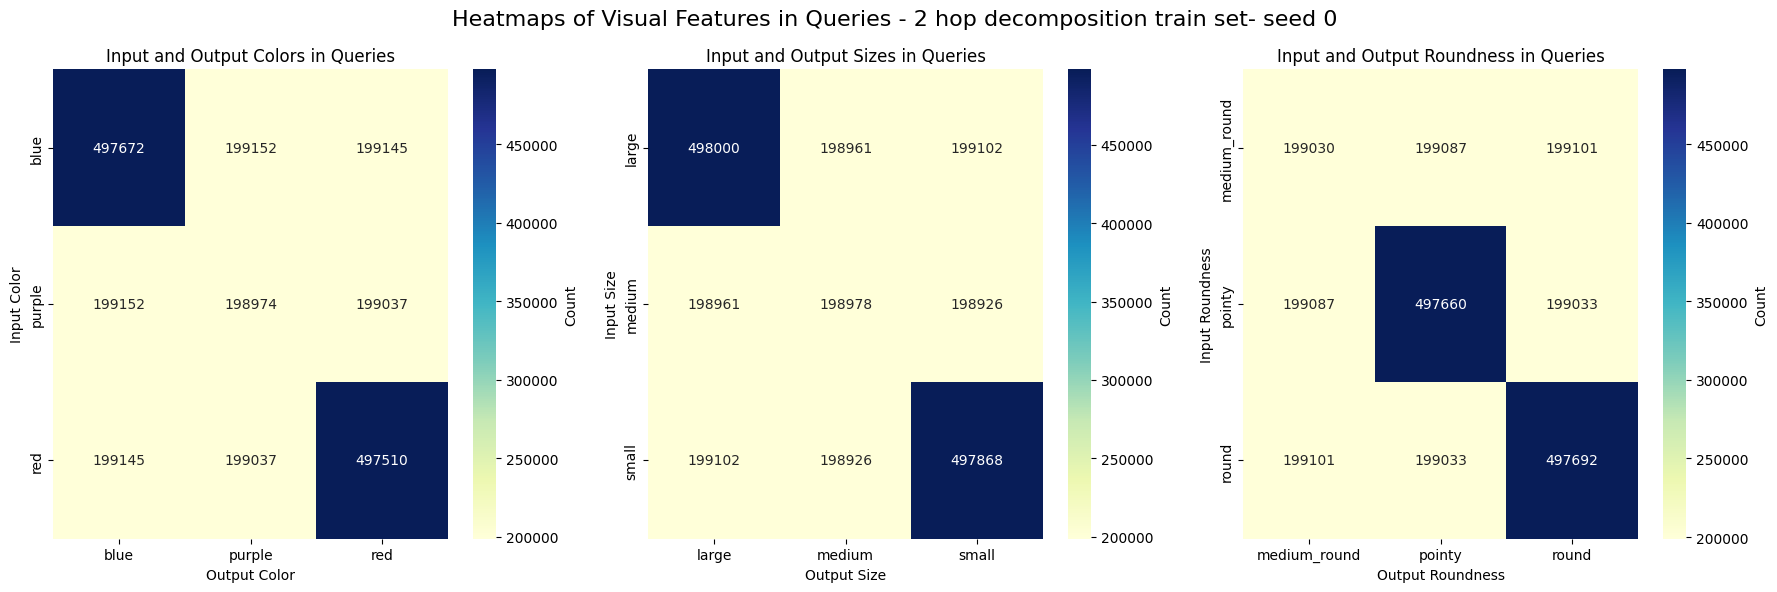

In [66]:
# Extract the color, size, and roundness features for input and output in queries
input_colors_query = []
output_colors_query = []
input_sizes_query = []
output_sizes_query = []
input_roundness_query = []
output_roundness_query = []



for episode_id in tqdm(episode_ids):
    supports = data['episodes'][episode_id]['query']
    for support in supports:
        # Parse the support string to extract input and output features
        parts = support.split(' -> ')
        input_part = parts[0]
        output_part = parts[1]

        # Extract input features
        input_color_start = input_part.find('color: ') + 7
        input_color_end = input_part.find(',', input_color_start)
        input_color = input_part[input_color_start:input_color_end]
        
        input_size_start = input_part.find('size: ') + 6
        input_size_end = input_part.find(',', input_size_start)
        input_size = input_part[input_size_start:input_size_end]
        
        input_round_start = input_part.find('roundness: ') + 11
        input_round_end = input_part.find(',', input_round_start)
        input_round = input_part[input_round_start:input_round_end]

        # Extract output features
        output_color_start = output_part.find('color: ') + 7
        output_color_end = output_part.find(',', output_color_start)
        output_color = output_part[output_color_start:output_color_end]
        
        output_size_start = output_part.find('size: ') + 6
        output_size_end = output_part.find(',', output_size_start)
        output_size = output_part[output_size_start:output_size_end]
        
        output_round_start = output_part.find('roundness: ') + 11
        output_round_end = output_part.find(',', output_round_start)
        output_round = output_part[output_round_start:output_round_end]

        input_colors_query.append(input_color)
        output_colors_query.append(output_color)
        input_sizes_query.append(input_size)
        output_sizes_query.append(output_size)
        input_roundness_query.append(input_round)
        output_roundness_query.append(output_round)
        
# Create DataFrames for each feature in queries
color_df_query = pd.DataFrame({
    'input_color': input_colors_query,
    'output_color': output_colors_query
})
size_df_query = pd.DataFrame({
    'input_size': input_sizes_query,
    'output_size': output_sizes_query
})
roundness_df_query = pd.DataFrame({
    'input_roundness': input_roundness_query,
    'output_roundness': output_roundness_query
})
# Calculate value counts for each feature in queries
print("Color feature pairs in queries:")
color_counts_query = color_df_query.groupby(['input_color', 'output_color']).size().reset_index(name='count')
for _, row in color_counts_query.iterrows():
    print(f"Input Color: {row['input_color']}, Output Color: {row['output_color']}, Count: {row['count']}")
print("\nSize feature pairs in queries:")
size_counts_query = size_df_query.groupby(['input_size', 'output_size']).size().reset_index(name='count')
for _, row in size_counts_query.iterrows():
    print(f"Input Size: {row['input_size']}, Output Size: {row['output_size']}, Count: {row['count']}")
print("\nRoundness feature pairs in queries:")
roundness_counts_query = roundness_df_query.groupby(['input_roundness', 'output_roundness']).size().reset_index(name='count')
for _, row in roundness_counts_query.iterrows():
    print(f"Input Roundness: {row['input_roundness']}, Output Roundness: {row['output_roundness']}, Count: {row['count']}")
# Create a DataFrame for visualization for the visual features in queries and create 3 heatmaps for each visual feature
df_query = pd.DataFrame({
    'input_color': input_colors_query,
    'output_color': output_colors_query,
    'input_size': input_sizes_query,
    'output_size': output_sizes_query,
    'input_roundness': input_roundness_query,
    'output_roundness': output_roundness_query
})
# Count the number of occurrences of each feature pair and create heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Color heatmap for queries
color_counts_query = df_query.groupby(['input_color', 'output_color']).size().reset_index(name='count')
color_pivot_query = color_counts_query.pivot(index='input_color', columns='output_color', values='count').fillna(0)
sns.heatmap(color_pivot_query.astype(int), annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, ax=axes[0])
axes[0].set_title('Input and Output Colors in Queries')
axes[0].set_xlabel('Output Color')
axes[0].set_ylabel('Input Color')
# Size heatmap for queries
size_counts_query = df_query.groupby(['input_size', 'output_size']).size().reset_index(name='count')
size_pivot_query = size_counts_query.pivot(index='input_size', columns='output_size', values='count').fillna(0)
sns.heatmap(size_pivot_query.astype(int), annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, ax=axes[1])
axes[1].set_title('Input and Output Sizes in Queries')
axes[1].set_xlabel('Output Size')
axes[1].set_ylabel('Input Size')
# Roundness heatmap for queries
roundness_counts_query = df_query.groupby(['input_roundness', 'output_roundness']).size().reset_index(name='count')
roundness_pivot_query = roundness_counts_query.pivot(index='input_roundness', columns='output_roundness', values='count').fillna(0)
# Define custom order for roundness
roundness_order_query = ['medium_round', 'pointy','round']
roundness_pivot_query = roundness_pivot_query.reindex(index=roundness_order_query, columns=roundness_order_query)
sns.heatmap(roundness_pivot_query.astype(int), annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, ax=axes[2])
axes[2].set_title('Input and Output Roundness in Queries')
axes[2].set_xlabel('Output Roundness')
axes[2].set_ylabel('Input Roundness')
fig.suptitle('Heatmaps of Visual Features in Queries - 2 hop decomposition train set- seed 0', fontsize=16)
plt.tight_layout()
plt.show()